<a href="https://colab.research.google.com/github/whdPdms04/2025-1-myclass-BDA/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **타이타닉호 데이터 분석 발표**


### *3조 BigData팀*

팀원 : 20241485 조예은, 20231589 지윤아, <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;20231560 지혜민, 20241525 이소윤, 20242511 이현승

In [1]:
import pandas as pd  # 데이터 조작과 분석에 쓰는 라이브러리
import matplotlib.pyplot as plt  # 그래프 그릴 때 기본으로 쓰는 도구
import seaborn as sns  # 통계적 시각화를 쉽게 만들어주는 도구
import numpy as np # 수치 밒 배열 연산을 지원해주는 도구

In [2]:
!pip install koreanize_matplotlib

#koreanize_matplotlib는 matplotlib 라이브러리에서 그래프를 그릴 때
#한글이 깨지지 않도록 도와주는 패키지입니다.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 66.6 MB/s eta 0:00:00


In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (10.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126109 files and direc

In [4]:
import matplotlib.pyplot as plt # 나눔 고딕 다운로드

plt.rc('font', family='NanumGothic')

In [5]:
# PC에서 그림 설정
plt.rcParams.update({'figure.dpi': '100'})
plt.rcParams.update({'figure.figsize': [6, 4]})

In [6]:
# 데이터프레임의 소수점 이하 n(2)자리 출력 설정
pd.set_option('display.precision', 2)

In [7]:
# 그림 선명하게
%config InlineBackend.figure_format = 'retina'

In [8]:
!pip install pyreadstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 617.7/617.7 kB 12.0 MB/s eta 0:00:00


# 데이터 셋 로드

In [9]:
titanic = pd.read_csv('titanic1309.csv')  # 'titanic1309.csv' 파일을 읽어서 데이터프레임으로 저장


In [10]:
# 데이터 구조 확인
titanic = pd.read_csv('titanic1309.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


In [11]:
# 데이터 프레임의 크기
titanic.shape

(1309, 12)

In [12]:
# 열 목록 확인
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
 # 데이터의 컬럼별 타입, 결측치 개수, 메모리 사용량 등 요약 정보 출력
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [14]:
# 수치형 변수 요약 통계
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.00,1309.00,1309.00,1046.00,1309.00,1309.00,1308.00
mean,655.00,0.38,2.29,29.88,0.50,0.39,33.30
std,378.02,0.48,0.84,14.41,1.04,0.87,51.76
min,1.00,0.00,1.00,0.17,0.00,0.00,0.00
25%,328.00,0.00,2.00,21.00,0.00,0.00,7.90
50%,655.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,982.00,1.00,3.00,39.00,1.00,0.00,31.27
max,1309.00,1.00,3.00,80.00,8.00,9.00,512.33


In [15]:
# 생존 여부 분포 (0 = 사망, 1 = 생존)
titanic['Survived'].value_counts()

,count
Survived,
0,815
1,494


# 데이터 전처리 및 결측치 확인

In [16]:
# 결측치 갯수 확인
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,263
SibSp,0
Parch,0
Ticket,0
Fare,1


In [17]:
# Age 결측치 채우기
age_median = titanic['Age'].median()
titanic['Age'].fillna(age_median, inplace = True)

<ipython-input-17-128f861892ab>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(age_median, inplace = True)


In [18]:
# 결측치 제거
titanic.drop('Cabin', axis = 1, inplace = True)

In [19]:
# 4. Embarked 결측치는 최빈값으로 채우기
embarked_mode = titanic['Embarked'].mode()[0] # 최빈값 추출
titanic['Embarked'].fillna(embarked_mode, inplace = True)

<ipython-input-19-1dc18de8c97e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Embarked'].fillna(embarked_mode, inplace = True)


In [20]:
# 5. 처리 후 다시 결측치 확인
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,1


# 데이터 시각화 및 변수 탐색

### 생존률 계산 및 출력

In [21]:
survival_rate = titanic['Survived'].mean() * 100   # 'Survived' 컬럼의 평균 계산 → 생존 비율(%)
print(f"생존율: {survival_rate:.2f}%")   # 소수점 둘째 자리까지 생존율 출력


생존율: 37.74%


### 생존자 및 비생존자 수 계산 및 출력

In [22]:
survivors = titanic['Survived'].sum()      # 생존자 수: 'Survived' 컬럼에서 1인 값들의 합
non_survivors = len(titanic) - survivors   # 비생존자 수: 전체 데이터 수에서 생존자 수를 뺌
print(f"생존자 수: {survivors}")        # 생존자 수 출력
print(f"비생존자 수: {non_survivors}")  # 비생존자 수 출력


생존자 수: 494
비생존자 수: 815


### 성별에 따른 생존률 계산 및 출력

In [23]:
survival_rate_by_gender = titanic.groupby('Sex')['Survived'].mean() * 100  # 'Sex'별로 그룹 지어 생존율(평균) 계산, 백분율로 변환

print("성별에 따른 생존율:")    # 성별 생존율 출력 안내 문구
print(survival_rate_by_gender)  # 성별별 생존율 출력


성별에 따른 생존율:
Sex
female    82.62
male      12.93
Name: Survived, dtype: float64


### 객실 등급에 따른 생존율 계산 및 출력

In [24]:
survival_rate_by_class = titanic.groupby('Pclass')['Survived'].mean() * 100  # 객실 등급(Pclass)별로 그룹 지어 생존율 계산, 백분율로 변환

print("객실 등급에 따른 생존율:")  # 객실 등급별 생존율 출력 안내 문구
print(survival_rate_by_class)      # 객실 등급별 생존율 출력


객실 등급에 따른 생존율:
Pclass
1    57.59
2    42.24
3    26.94
Name: Survived, dtype: float64


### 나이에 따른 생존율 계산 및 출력

In [25]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())  # 나이(Age) 결측값을 전체 평균나이로 대체

survival_rate_by_age = titanic.groupby('Age')['Survived'].mean() * 100  # 나이별로 그룹 지어 생존율 계산, 백분율로 변환

print("나이에 따른 생존율:")  # 나이별 생존율 출력 안내 문구
print(survival_rate_by_age)   # 나이별 생존율 출력


나이에 따른 생존율:
Age
0.17     100.00
0.33       0.00
0.42     100.00
0.67     100.00
0.75      66.67
          ...  
70.50      0.00
71.00      0.00
74.00      0.00
76.00    100.00
80.00    100.00
Name: Survived, Length: 98, dtype: float64


In [26]:
# 라이브러리 불러오기

import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
!apt-get -qq -y install fonts-nanum


In [28]:
import matplotlib as mpl
import os

# 캐시 경로 확인 및 삭제
cache_dir = mpl.get_cachedir()
print("matplotlib 캐시 디렉토리:", cache_dir)

# 폰트 캐시 삭제
try:
    os.remove(os.path.join(cache_dir, 'fontlist-v330.json'))  # 버전은 다를 수 있음
except FileNotFoundError:
    print("캐시 파일이 이미 삭제되었거나 없습니다.")


matplotlib 캐시 디렉토리: /root/.cache/matplotlib
캐시 파일이 이미 삭제되었거나 없습니다.


In [29]:
# 마이너스 부호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/loca

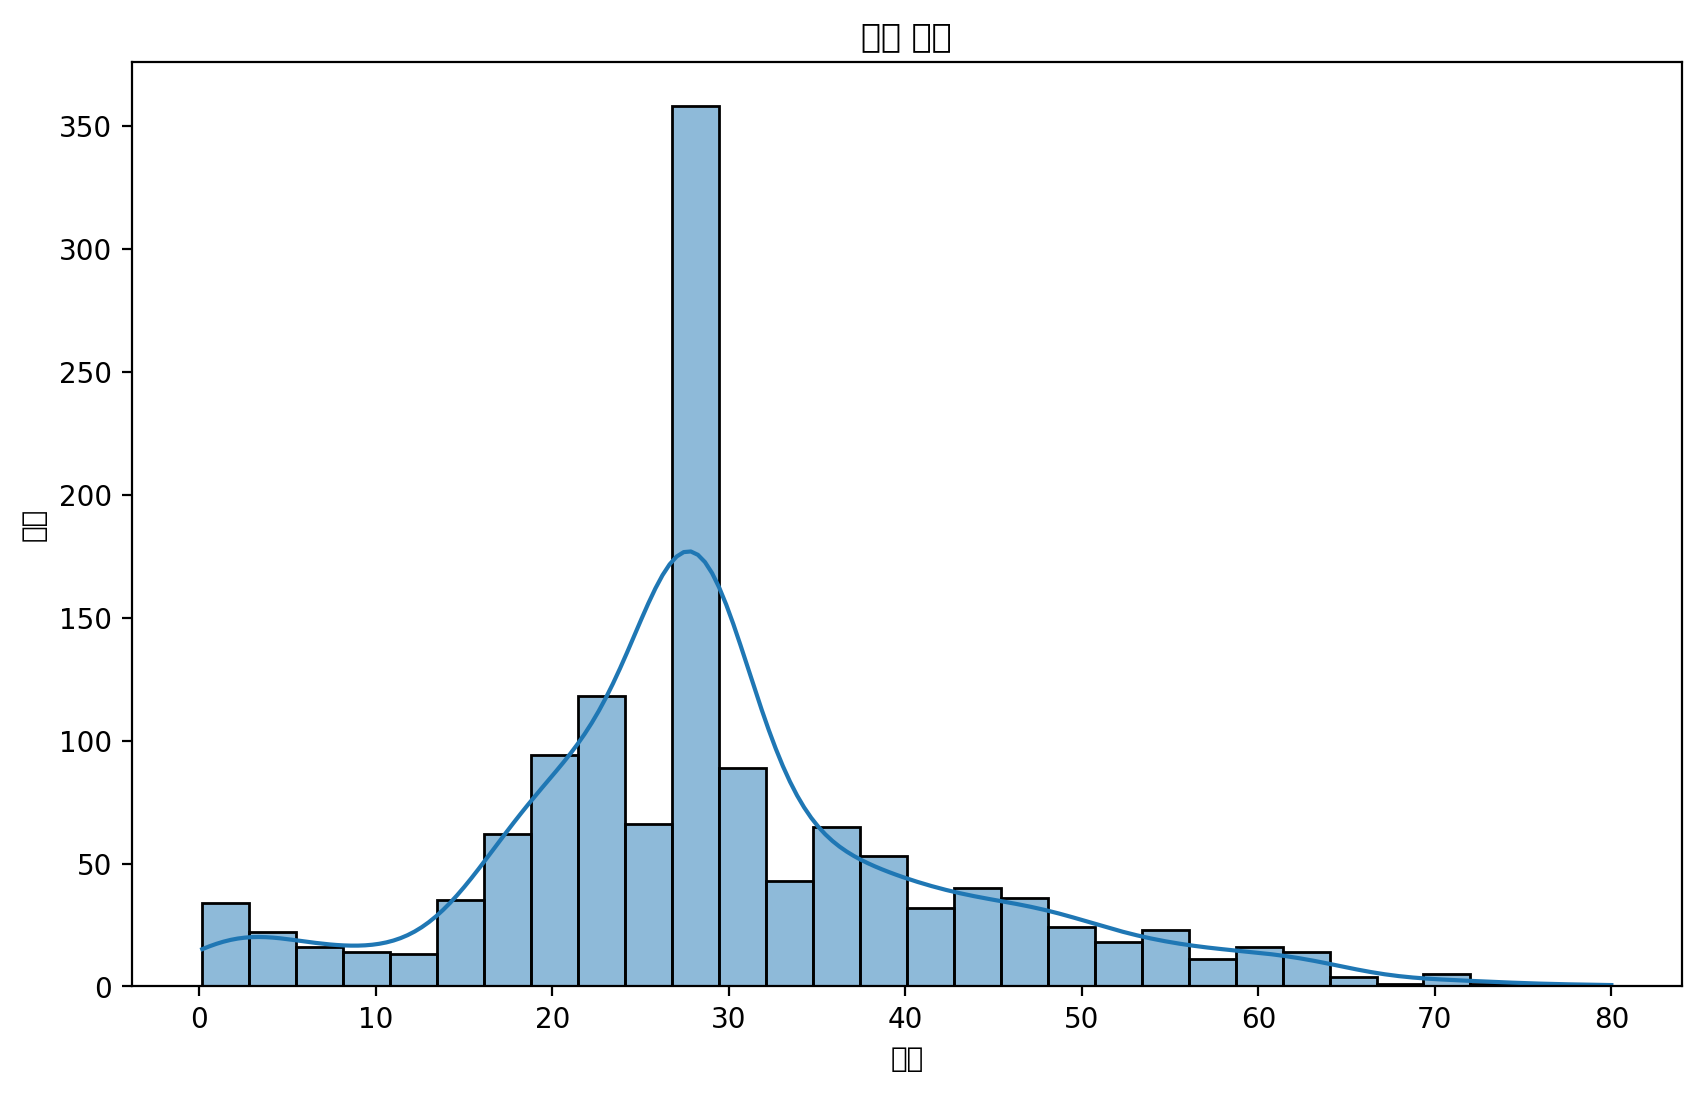

In [30]:
plt.figure(figsize=(10, 6))  # 그래프 크기 지정 (가로 10, 세로 6)
sns.histplot(titanic['Age'], kde=True, bins=30)  # 나이 분포 히스토그램과 커널 밀도 추정(kde) 그리기, 구간 30개로 나눔
plt.title('나이 분포')  # 그래프 제목 설정
plt.xlabel('나이')  # x축 라벨 설정
plt.ylabel('빈도')  # y축 라벨 설정
plt.show()  # 그래프 출력


### 성별에 따른 생존율 시각화

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46384 (\N{HANGUL SYLLABLE DDA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47480 (\N{HANGUL SYLLABLE REUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/u

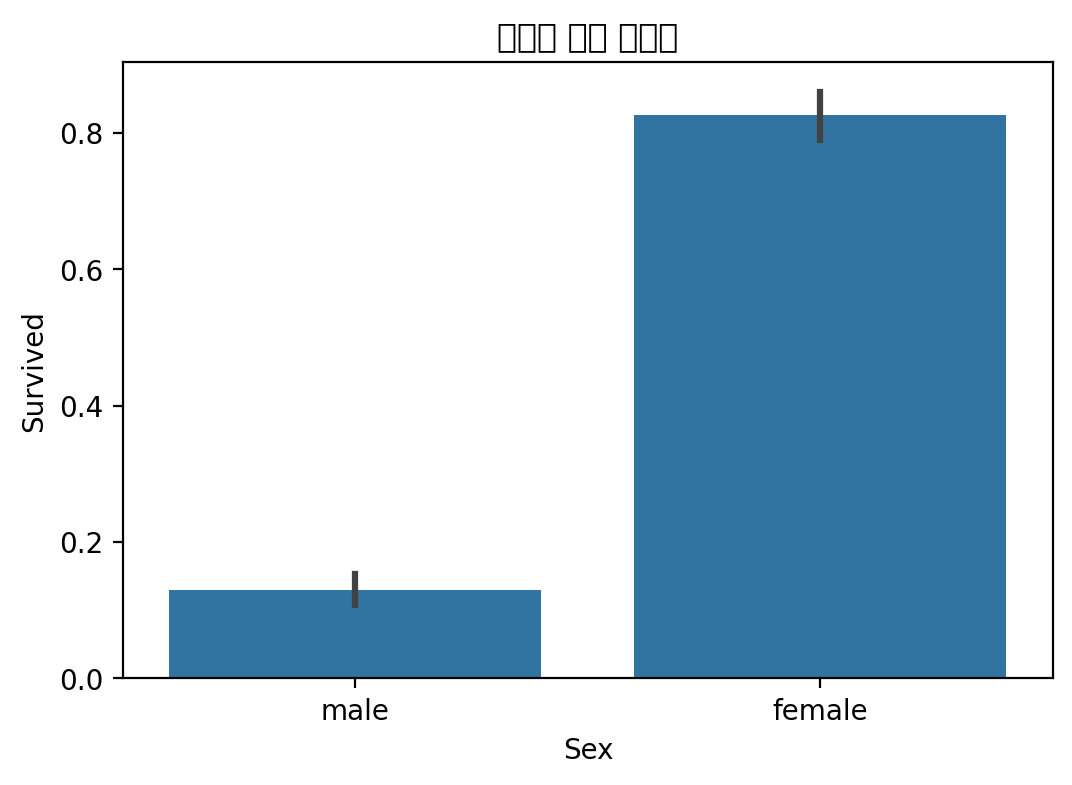

In [31]:
# 1. 성별(Sex)과 생존률 시각화(막대그래프)

sns.barplot(x='Sex', y='Survived', data=titanic)
plt.title('성별에 따른 생존률')
plt.show()

### 객실 등급에 따른 생존율 시각화

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46321 (\N{HANGUL SYLLABLE DEUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44553 (\N{HANGUL SYLLABLE GEUB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/us

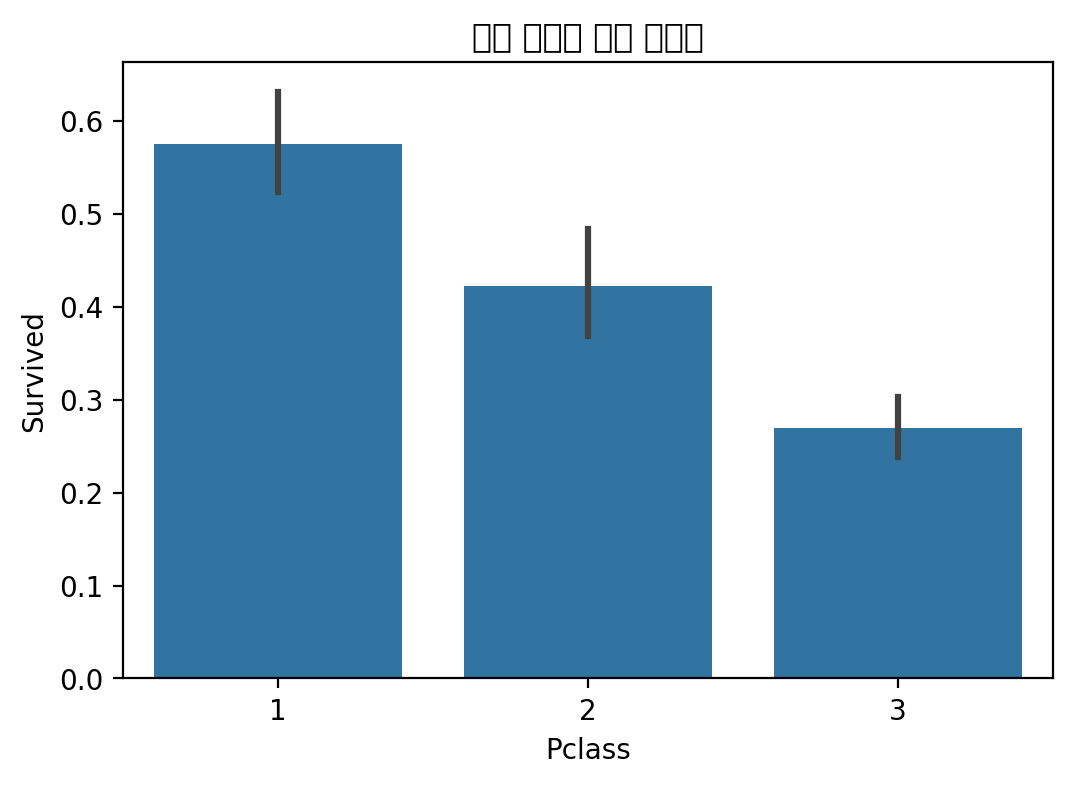

In [32]:
# 1. 객실 등급에 따른 생존율

sns.barplot(x='Pclass', y='Survived', data=titanic)
plt.title('객실 등급에 따른 생존률')
plt.show()

### 나이에 따른 생존율 시각화

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46384 (\N{HANGUL SYLLABLE DDA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47480 (\N{HANGUL SYLLABLE REUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/loca

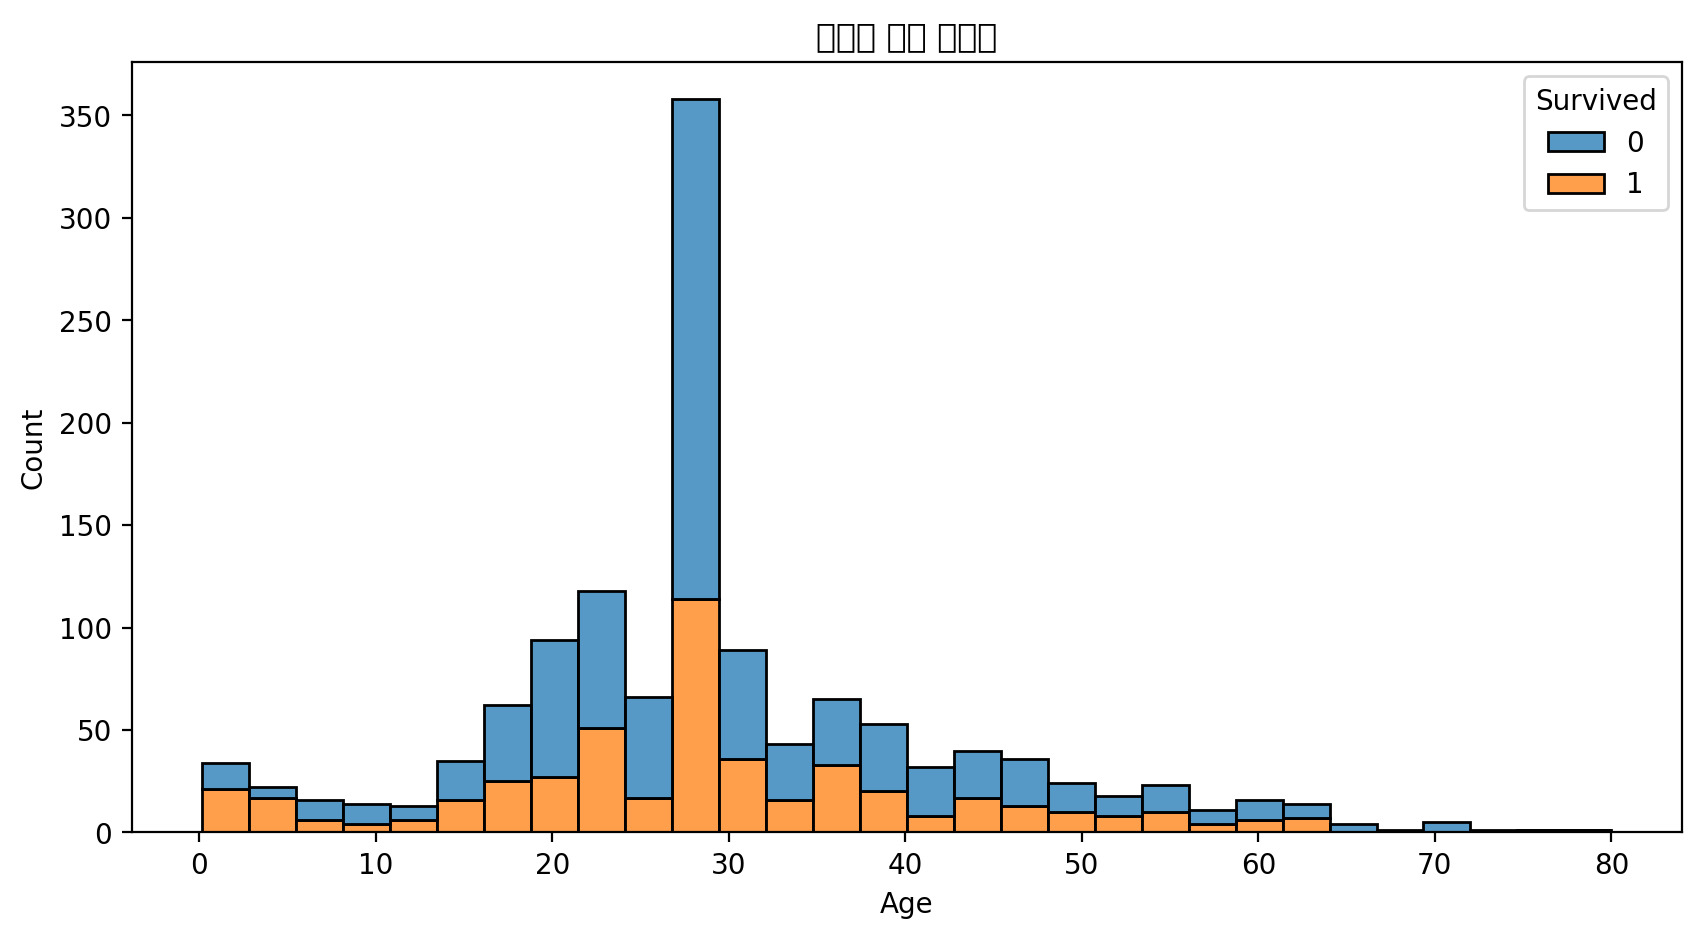

In [33]:
# 나이에 따른 생존율

plt.figure(figsize = (10, 5))
sns.histplot(data = titanic, x = 'Age', hue = 'Survived', multiple = 'stack', bins = 30)
plt.title('나이에 따른 생존률')
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51316 (\N{HANGUL SYLLABLE JON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


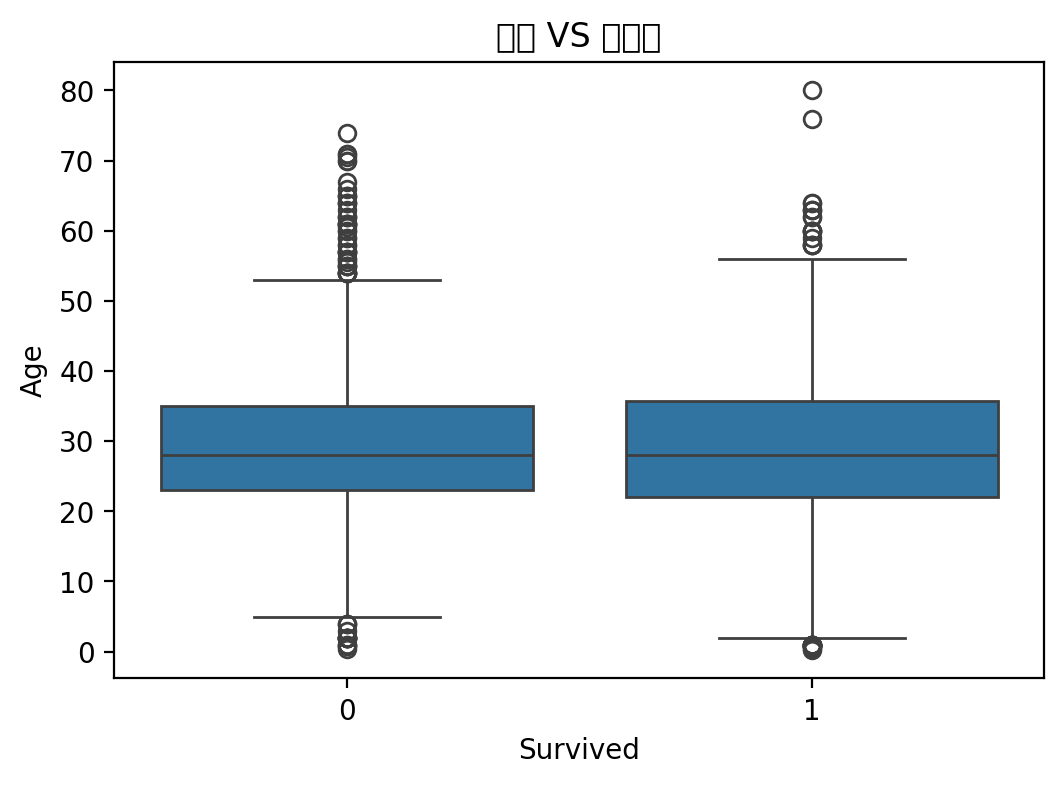

In [34]:
# 상자 그림(Boxplot) - 나이와 생존 여부
sns.boxplot(x = 'Survived', y = 'Age', data = titanic)
plt.title('나이 VS 생존률')
plt.show()

### 요금에 따른 생존율 계산 및 출력

In [35]:
survival_rate_by_fare = titanic.groupby('Fare')['Survived'].mean() * 100  # 요금(Fare)별로 그룹 지어 생존율 계산, 백분율로 변환

print("요금에 따른 생존율:")  # 요금별 생존율 출력 안내 문구
print(survival_rate_by_fare)  # 요금별 생존율 출력


요금에 따른 생존율:
Fare
0.00        5.88
3.17        0.00
4.01        0.00
5.00        0.00
6.24        0.00
           ...  
227.53     60.00
247.52     66.67
262.38     71.43
263.00     66.67
512.33    100.00
Name: Survived, Length: 281, dtype: float64


### 요금 분포 시각화

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

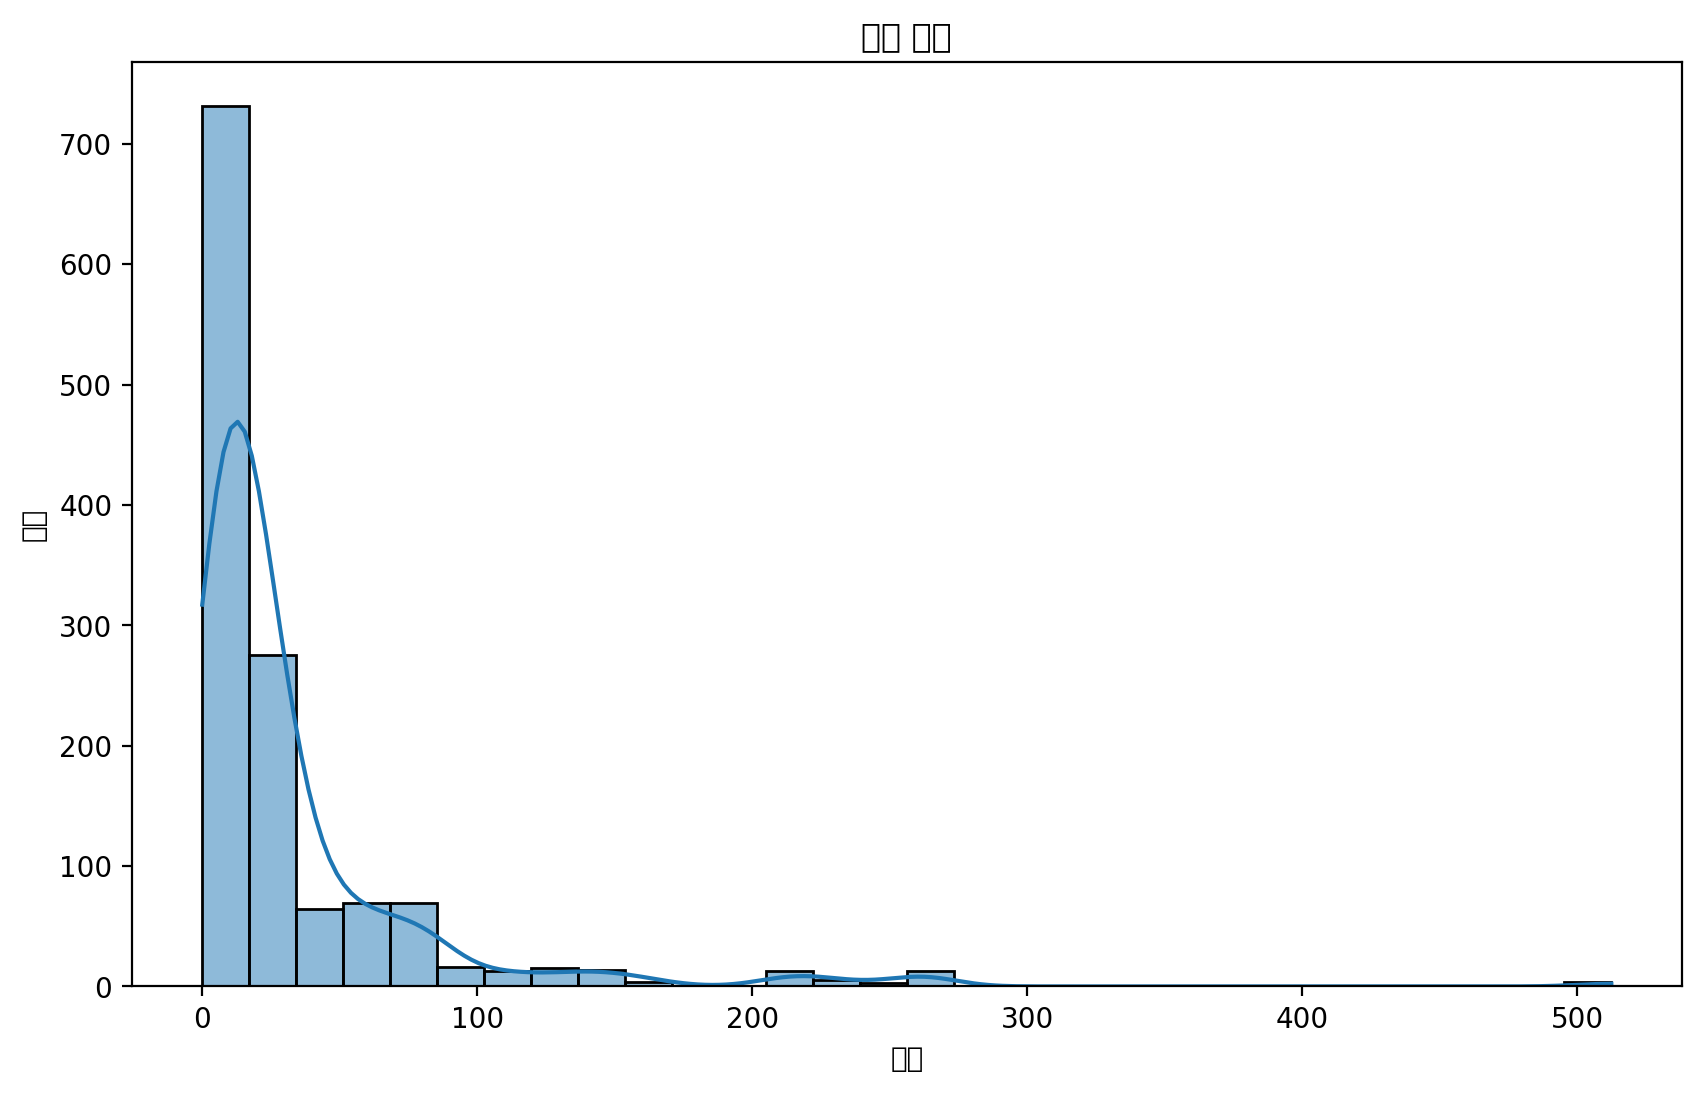

In [36]:
plt.figure(figsize=(10, 6))  # 그래프 크기 지정 (가로 10, 세로 6)
sns.histplot(titanic['Fare'], kde=True, bins=30)  # 요금 분포 히스토그램과 커널 밀도 추정(kde) 그리기, 구간 30개로 나눔
plt.title('요금 분포')  # 그래프 제목 설정
plt.xlabel('요금')  # x축 라벨 설정
plt.ylabel('빈도')  # y축 라벨 설정
plt.show() # 그래프 출력


### 요금에 따른 생존율 시각화

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46321 (\N{HANGUL SYLLABLE DEUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44553 (\N{HANGUL SYLLABLE GEUB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/us

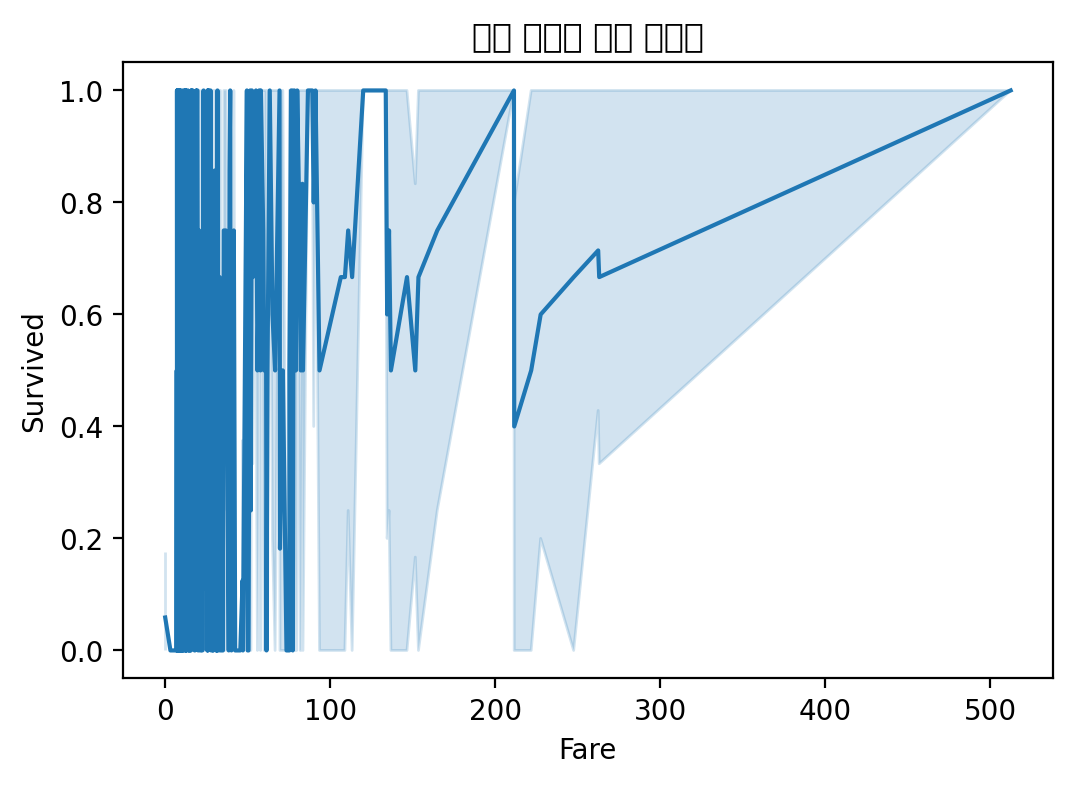

In [37]:
# 1. 요금에 따른 생존율

sns.lineplot(x='Fare', y='Survived', data=titanic)
plt.title('객실 등급에 따른 생존률')
plt.show()

### 승선 항구에 따른 생존율 계산 및 출력

In [38]:
survival_rate_by_embarked = titanic.groupby('Embarked')['Survived'].mean() * 100  # 승선 항구(Embarked)별로 그룹 지어 생존율 계산, 백분율로 변환

print("승선 항구에 따른 생존율:")  # 승선 항구별 생존율 출력 안내 문구
print(survival_rate_by_embarked)   # 승선 항구별 생존율 출력


승선 항구에 따른 생존율:
Embarked
C    49.26
Q    43.90
S    33.52
Name: Survived, dtype: float64


### 승선 항구에 따른 생존율 시각화

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54637 (\N{HANGUL SYLLABLE HANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr

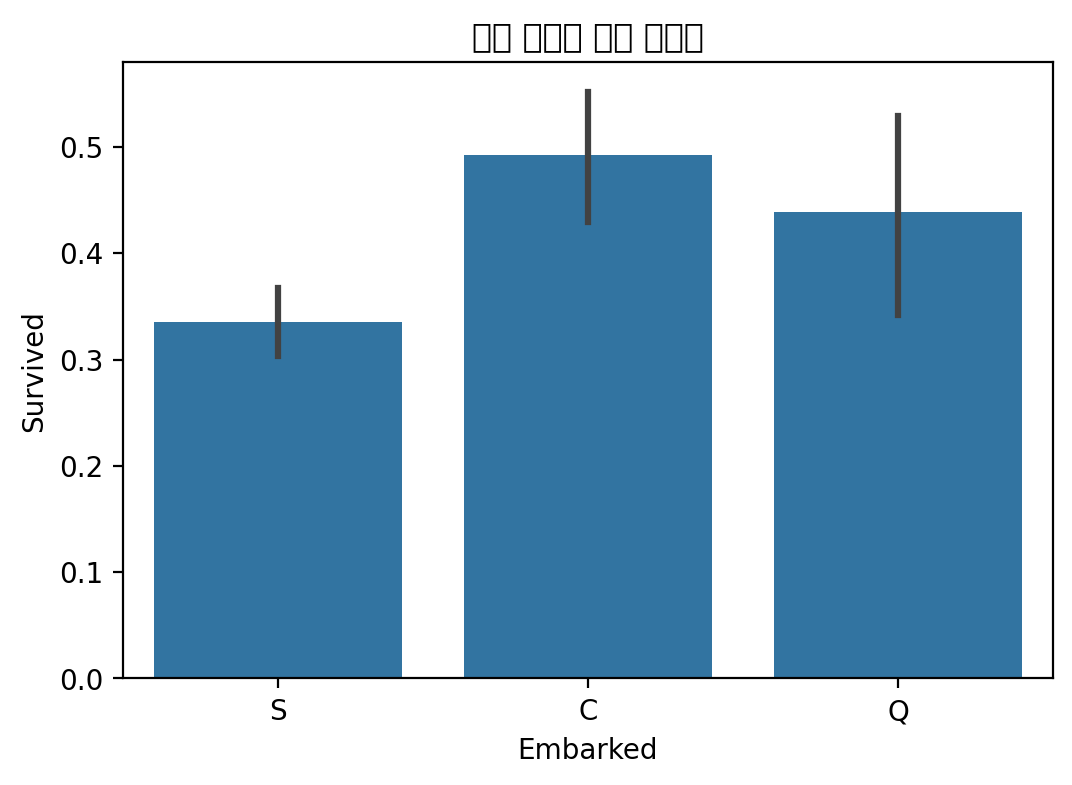

In [39]:
# 1. 승선 항구에 따른 생존율

sns.barplot(x='Embarked', y='Survived', data=titanic)
plt.title('승선 항구에 따른 생존률')
plt.show()

### 가족 수에 따른 생존율 계산 및 출력

In [40]:
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1  # 가족 크기 계산: 형제자매(SibSp) + 부모자식(Parch) + 본인 1명 포함

survival_rate_by_family_size = titanic.groupby('FamilySize')['Survived'].mean() * 100  # 가족 크기별 생존율 계산, 백분율로 변환

print("가족 수에 따른 생존율:")      # 가족 크기별 생존율 출력 안내 문구
print(survival_rate_by_family_size)  # 가족 크기별 생존율 출력


가족 수에 따른 생존율:
FamilySize
1     29.24
2     53.19
3     55.97
4     72.09
5     22.73
6     20.00
7     31.25
8     12.50
11    18.18
Name: Survived, dtype: float64


### 가족 수에 따른 생존율 시각화

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51313 (\N{HANGUL SYLLABLE JOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46384 (\N{HANGUL SYLLABLE DDA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/loca

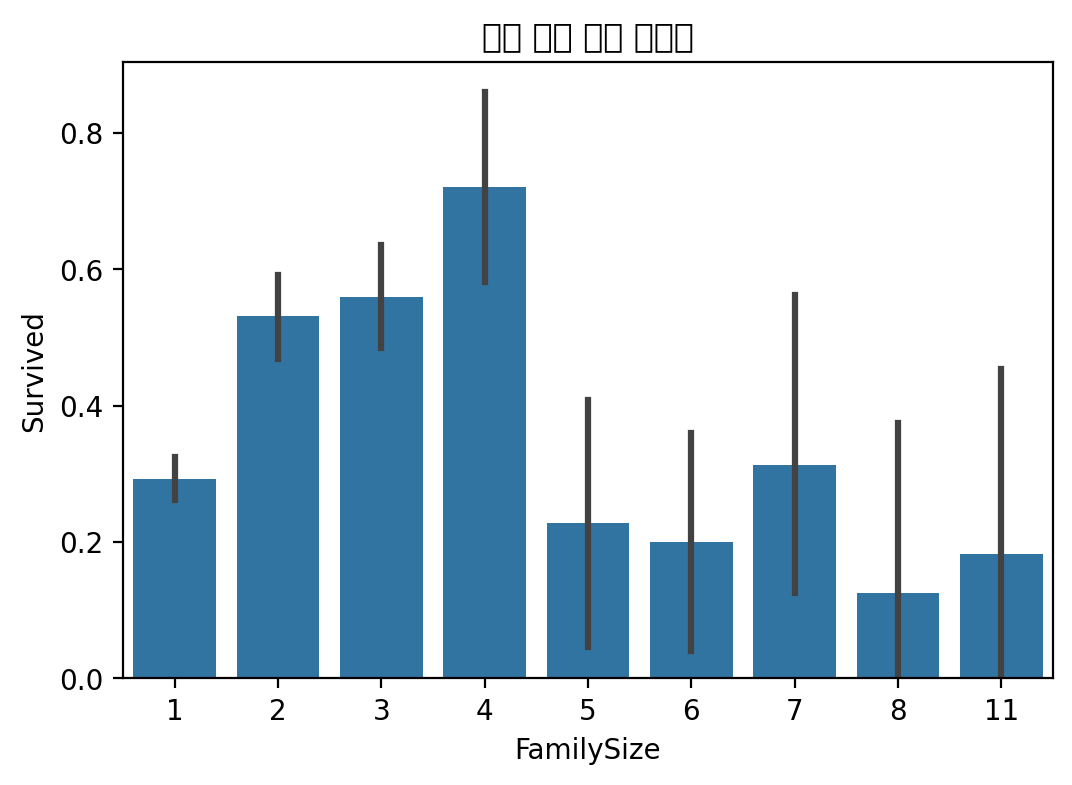

In [41]:
# 가족 수에 따른 생존율

sns.barplot(x='FamilySize', y='Survived', data=titanic)
plt.title('가족 수에 따른 생존률')
plt.show()


### 나이와 성별에 따른 생존율 계산 및 출력

In [42]:
survival_rate_by_age_gender = titanic.groupby(['Age', 'Sex'])['Survived'].mean() * 100  # 나이와 성별을 기준으로 그룹 지어 생존율 계산, 백분율로 변환

print("나이와 성별에 따른 생존율:")  # 나이 및 성별별 생존율 출력 안내 문구
print(survival_rate_by_age_gender)   # 나이와 성별별 생존율 출력


나이와 성별에 따른 생존율:
Age    Sex   
0.17   female    100.0
0.33   male        0.0
0.42   male      100.0
0.67   male      100.0
0.75   female    100.0
                 ...  
70.50  male        0.0
71.00  male        0.0
74.00  male        0.0
76.00  female    100.0
80.00  male      100.0
Name: Survived, Length: 166, dtype: float64


### 나이와 성별에 따른 생존율 시각화

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

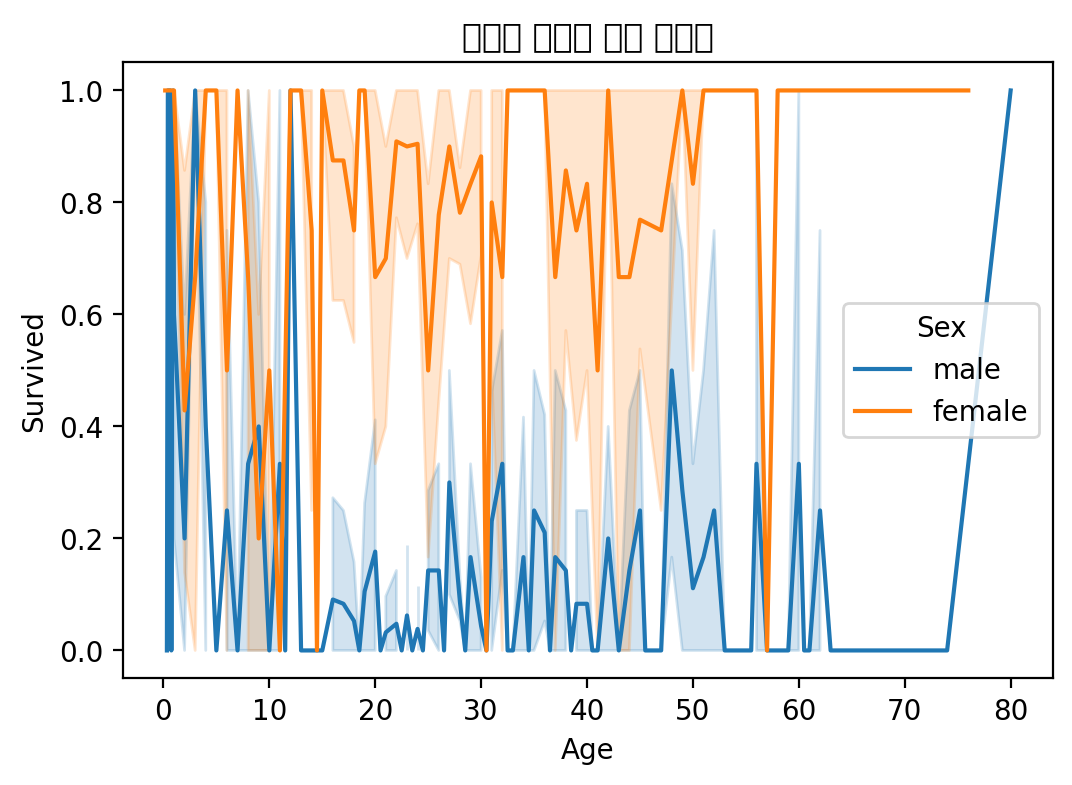

In [43]:
# 나이와 성별에 따른 생존율 시각화

sns.lineplot(x='Age', y='Survived', hue = 'Sex', data=titanic)
plt.title('나이와 성별에 따른 생존율')
plt.show()


### 객실 등급과 성별에 따른 생존율 계산 및 출력

In [44]:
survival_rate_by_class_gender = titanic.groupby(['Pclass', 'Sex'])['Survived'].mean() * 100  # 객실 등급(Pclass)과 성별(Sex)별로 그룹 지어 생존율 계산, 백분율로 변환

print("객실 등급과 성별에 따른 생존율:")  # 객실 등급과 성별별 생존율 출력 안내 문구
print(survival_rate_by_class_gender)      # 객실 등급과 성별별 생존율 출력


객실 등급과 성별에 따른 생존율:
Pclass  Sex   
1       female    97.92
        male      25.14
2       female    94.34
        male       9.94
3       female    66.67
        male       9.53
Name: Survived, dtype: float64


### 객실 등급과 성별에 따른 생존율 시각화

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46321 (\N{HANGUL SYLLABLE DEUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44553 (\N{HANGUL SYLLABLE GEUB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/

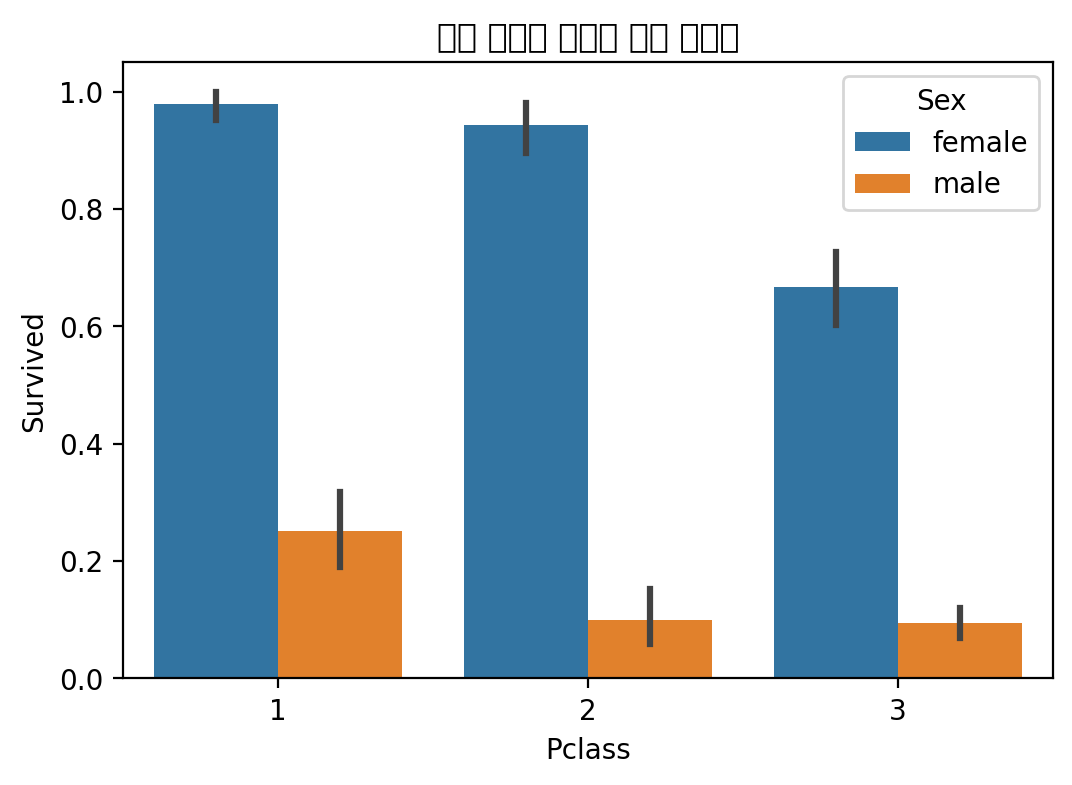

In [45]:
# 객실 등급과 성별에 따른 생존율

sns.barplot(x='Pclass', y='Survived', hue = 'Sex', data=titanic)
plt.title('객실 등급과 성별에 따른 생존률')
plt.show()


### 나이와 객실 등급에 따른 생존율 계산 및 출력

In [46]:
survival_rate_by_age_class = titanic.groupby(['Age', 'Pclass'])['Survived'].mean() * 100  # 나이와 객실 등급(Pclass)별로 그룹 지어 생존율 계산, 백분율로 변환

print("나이와 객실 등급에 따른 생존율:")  # 나이와 객실 등급별 생존율 출력 안내 문구
print(survival_rate_by_age_class)         # 나이와 객실 등급별 생존율 출력


나이와 객실 등급에 따른 생존율:
Age    Pclass
0.17   3         100.00
0.33   3           0.00
0.42   3         100.00
0.67   2         100.00
0.75   3          66.67
                  ...  
70.50  3           0.00
71.00  1           0.00
74.00  3           0.00
76.00  1         100.00
80.00  1         100.00
Name: Survived, Length: 209, dtype: float64


### 나이와 객실 등급에 따른 생존율 시각화

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/loc

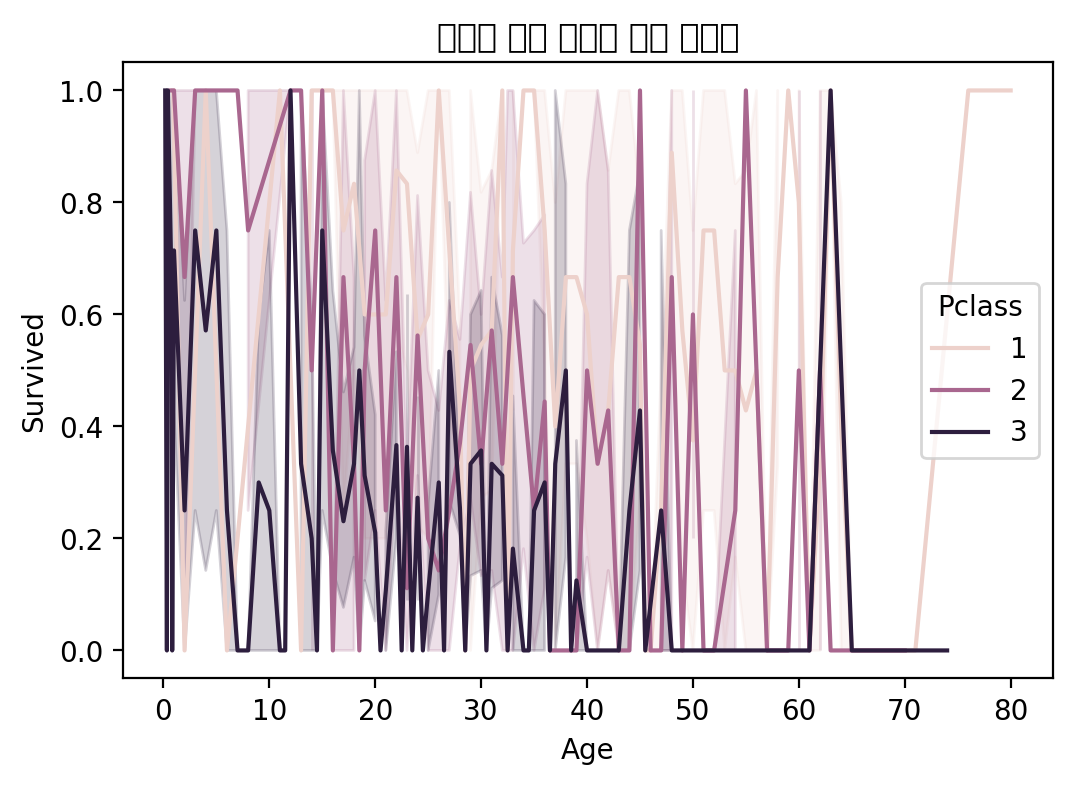

In [47]:
# 나이와 객실 등급에 따른 생존율

sns.lineplot(x='Age', y='Survived', hue = 'Pclass', data=titanic)
plt.title('나이와 객실 등급에 따른 생존률')
plt.show()

### 요금과 성별에 따른 생존율 계산 및 출력

In [48]:
survival_rate_by_fare_gender = titanic.groupby(['Fare', 'Sex'])['Survived'].mean() * 100  # 요금(Fare)과 성별(Sex)별로 그룹 지어 생존율 계산, 백분율로 변환

print("요금과 성별에 따른 생존율:")  # 요금과 성별별 생존율 출력 안내 문구
print(survival_rate_by_fare_gender)  # 요금과 성별별 생존율 출력


요금과 성별에 따른 생존율:
Fare    Sex   
0.00    male        5.88
3.17    male        0.00
4.01    male        0.00
5.00    male        0.00
6.24    male        0.00
                   ...  
262.38  male        0.00
263.00  female    100.00
        male        0.00
512.33  female    100.00
        male      100.00
Name: Survived, Length: 425, dtype: float64


### 요금과 성별에 따른 생존율 시각화

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/

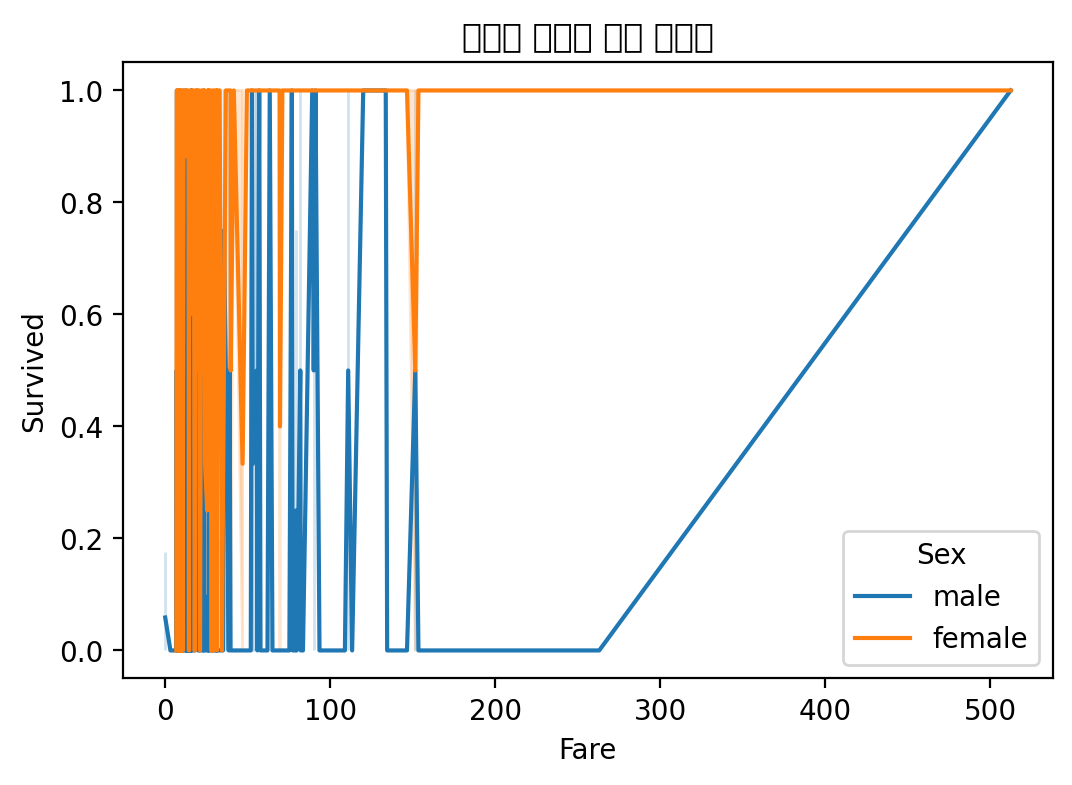

In [49]:
# 요금과 성별에 따른 생존율

sns.lineplot(x='Fare', y='Survived', hue = 'Sex', data=titanic)
plt.title('요금과 성별에 따른 생존률')
plt.show()

### 요금과 객실 등급에 따른 생존율 계산 및 출력

In [50]:
survival_rate_by_fare_class = titanic.groupby(['Fare', 'Pclass'])['Survived'].mean() * 100  # 요금(Fare)과 객실 등급(Pclass)별로 그룹 지어 생존율 계산, 백분율로 변환

print("\n요금과 객실 등급에 따른 생존율:")  # 요금과 객실 등급별 생존율 출력 안내 문구
print(survival_rate_by_fare_class)          # 요금과 객실 등급별 생존율 출력



요금과 객실 등급에 따른 생존율:
Fare    Pclass
0.00    1           0.00
        2           0.00
        3          25.00
3.17    3           0.00
4.01    3           0.00
                   ...  
227.53  1          60.00
247.52  1          66.67
262.38  1          71.43
263.00  1          66.67
512.33  1         100.00
Name: Survived, Length: 288, dtype: float64


### 요금과 객실 등급에 따른 생존율 시각화

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr

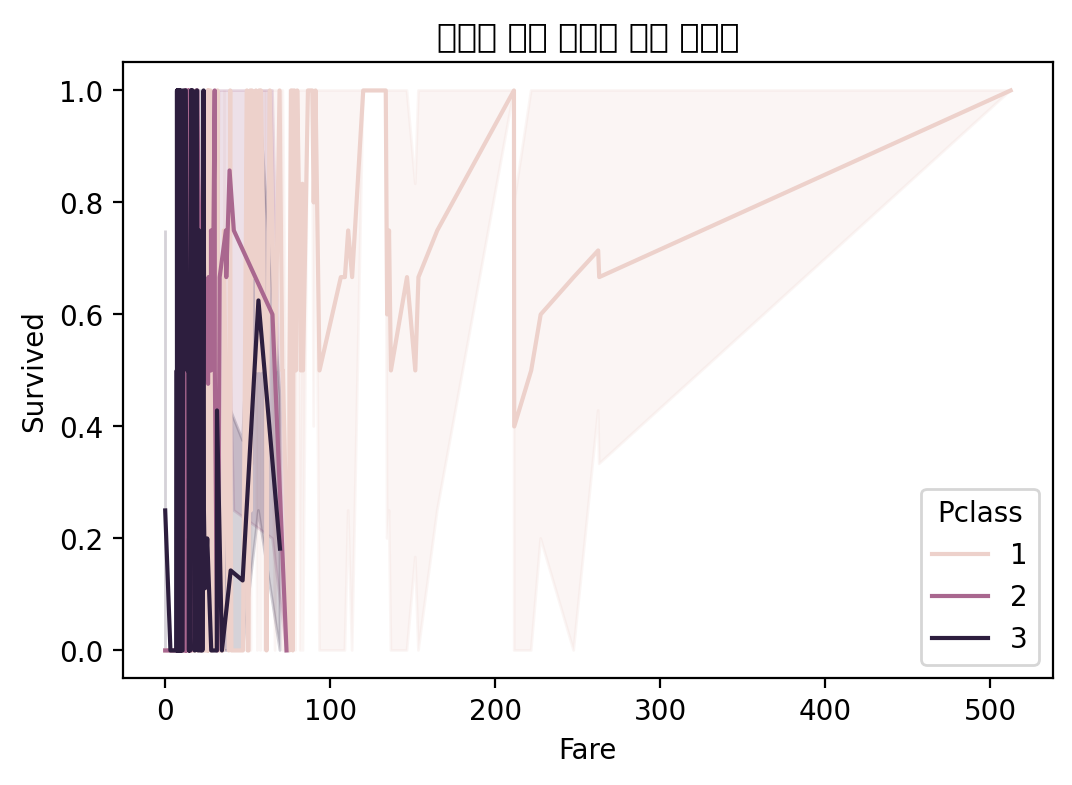

In [51]:
# 요금과 객실 등급에 따른 생존율

sns.lineplot(x='Fare', y='Survived', hue = 'Pclass', data=titanic)
plt.title('요금과 객실 등급에 따른 생존률')
plt.show()

### 승선 항구와 성별에 따른 생존율 계산 및 출력

In [52]:
survival_rate_by_embarked_gender = titanic.groupby(['Embarked', 'Sex'])['Survived'].mean() * 100  # 승선 항구(Embarked)와 성별(Sex)별로 그룹 지어 생존율 계산, 백분율로 변환

print("\n승선 항구와 성별에 따른 생존율:")  # 승선 항구와 성별별 생존율 출력 안내 문구
print(survival_rate_by_embarked_gender)     # 승선 항구와 성별별 생존율 출력



승선 항구와 성별에 따른 생존율:
Embarked  Sex   
C         female    92.04
          male      18.47
Q         female    85.00
          male       4.76
S         female    78.50
          male      12.36
Name: Survived, dtype: float64


### 승선 항구와 성별에 따른 생존율 시각화

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54637 (\N{HANGUL SYLLABLE HANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/us

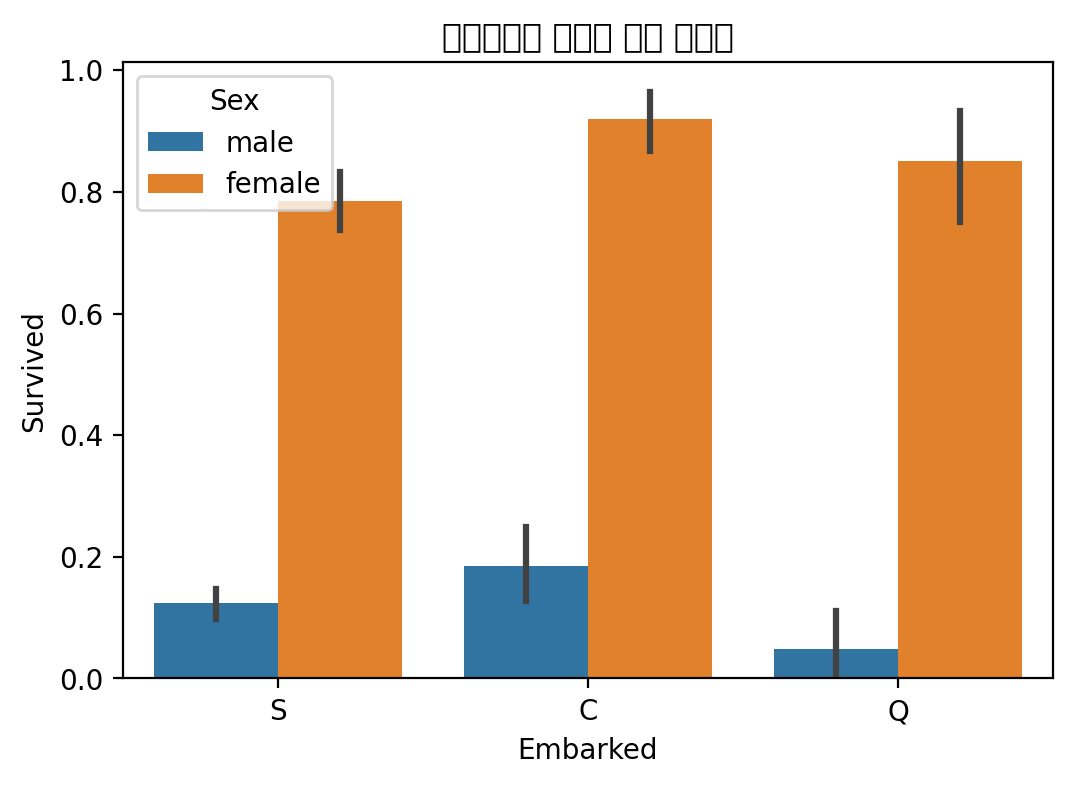

In [53]:
# 승선 항구와 성별에 따른 생존율

sns.barplot(x='Embarked', y='Survived', hue = 'Sex', data=titanic)
plt.title('승선항구와 성별에 따른 생존률')
plt.show()

### 승선 항구와 객실 등급에 따른 생존율 계산 및 출력






In [54]:
survival_rate_by_embarked_class = titanic.groupby(['Embarked', 'Pclass'])['Survived'].mean() * 100  # 승선 항구(Embarked)와 객실 등급(Pclass)별로 그룹 지어 생존율 계산, 백분율로 변환

print("\n승선 항구와 객실 등급에 따른 생존율:")  # 승선 항구와 객실 등급별 생존율 출력 안내 문구
print(survival_rate_by_embarked_class)           # 승선 항구와 객실 등급별 생존율 출력



승선 항구와 객실 등급에 따른 생존율:
Embarked  Pclass
C         1         61.70
          2         46.43
          3         32.67
Q         1         66.67
          2         28.57
          3         44.25
S         1         54.19
          2         42.15
          3         21.82
Name: Survived, dtype: float64


### 승선 항구와 객실 등급에 따른 생존율 시각화

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54637 (\N{HANGUL SYLLABLE HANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/us

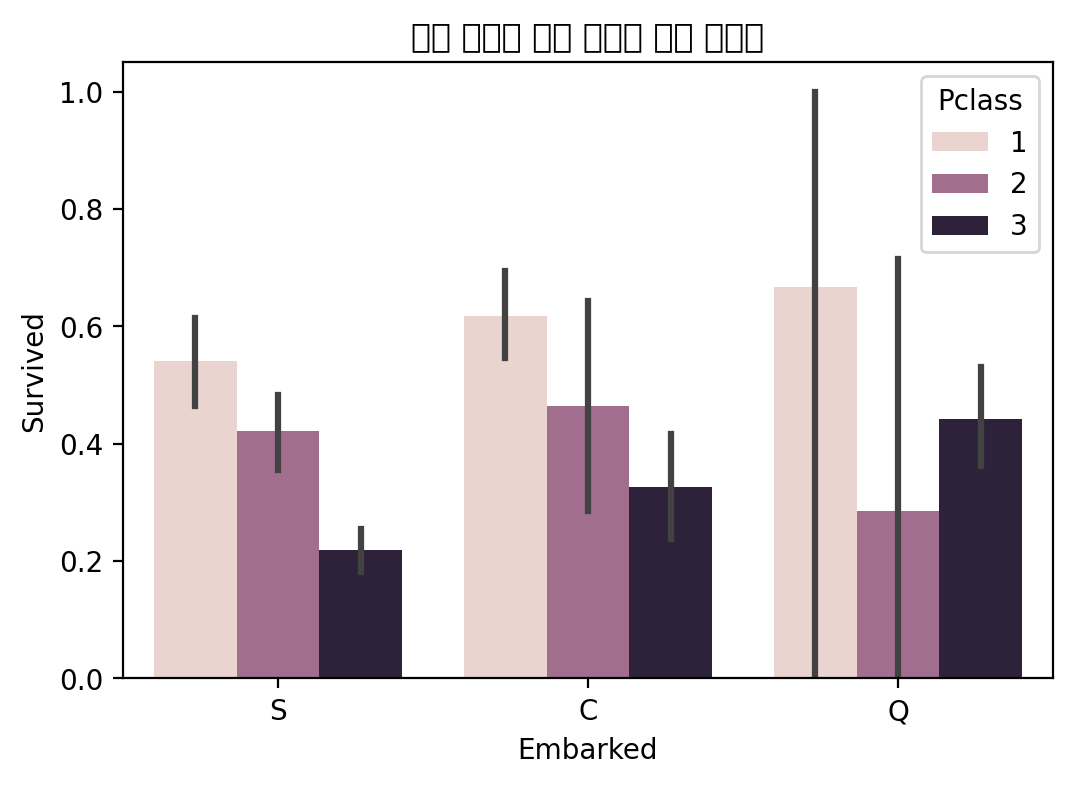

In [55]:
# 승선 항구와 객실 등급에 따른 생존율

sns.barplot(x='Embarked', y='Survived', hue = 'Pclass', data=titanic)
plt.title('승선 항구와 객실 등급에 따른 생존률')
plt.show()

# 숫자형 인코딩

In [56]:
# 성별: male → 0, female → 1
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})

In [57]:
# Embarked: S → 0, C → 1, Q → 2
titanic['Embarked'] = titanic['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# 결측값 처리 (titanic에 NaN이 있을 수 있음)
titanic['Embarked'].fillna(0, inplace=True)

<ipython-input-57-4459323f2a27>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Embarked'].fillna(0, inplace=True)


In [58]:
# 1. 문자열 → 숫자 변환
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)
titanic['Embarked'] = titanic['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# 2. 나이와 요금의 결측치도 채움
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic['Fare'].fillna(titanic['Fare'].median(), inplace=True)


<ipython-input-58-cbc3b96a2fd8>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)
<ipython-input-58-cbc3b96a2fd8>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

### 인코딩 결과

In [59]:
print(titanic[['Sex', 'Embarked']].head())

   Sex  Embarked
0  NaN       NaN
1  NaN       NaN
2  NaN       NaN
3  NaN       NaN
4  NaN       NaN


# 머신러닝 모델 훈련 및 검증

In [60]:
# 사용할 피처(입력 변수) 선택

# 사용할 피처들
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

x = titanic[features] # 입력 변수 (독립 변수)
y = titanic['Survived'] # 정답 (종속 변수)

### 학습/ 검증 데이터 분석과 모델학습

In [61]:
# 학습/ 검증 데이터 분석

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42)


# 모델학습

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)
print("검증 정확도: {:.2f}%".format(accuracy_score(y_valid, y_pred) * 100))

검증 정확도: 67.18%


# 모델 평가

In [62]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_valid, y_pred)
print("검증 정확도 : {:.2f}%".format(accuracy * 100))

검증 정확도 : 67.18%


# 실제 예측 및 시나리오 분석

In [63]:
# 1st information

import pandas as pd

my_passenger = pd.DataFrame([{
    'Pclass' : 2,
    'Sex' : 0,
    'Age' : 22,
    'SibSp' : 1,
    'Parch' : 2,
    'Fare' : 100,
    'Embarked' : 2
}])

In [64]:
prediction = model.predict(my_passenger)
print("예측 결과 (1: 생존, 0: 사망):", prediction[0])


예측 결과 (1: 생존, 0: 사망): 1


In [65]:
# 2nd information

import pandas as pd

my_passenger2 = pd.DataFrame([{
    'Pclass' : 1,
    'Sex' : 0,
    'Age' : 54,
    'SibSp' : 1,
    'Parch' : 2,
    'Fare' : 700,
    'Embarked' :1
}])

In [66]:
prediction = model.predict(my_passenger2)
print("예측 결과 (1: 생존, 0: 사망):", prediction[0])

예측 결과 (1: 생존, 0: 사망): 1


In [67]:
# 3rd information

import pandas as pd

my_passenger3 = pd.DataFrame([{
    'Pclass' : 1,
    'Sex' : 1,
    'Age' : 46,
    'SibSp' : 1,
    'Parch' : 1,
    'Fare' : 550,
    'Embarked' : 0
}])

In [68]:
prediction = model.predict(my_passenger3)
print("예측 결과 (1: 생존, 0: 사망):", prediction[0])

예측 결과 (1: 생존, 0: 사망): 1


# The End.